In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Assignment 1 Exploratory Adata Analysis

#### I used the artists.csv and arts.csv files provided by the MoMa collection for this analysis

#### First I imported the data to be able to use the .head command to take a look at the columns that each data has provided.

In [4]:
artists = pd.read_csv("Data/artists.csv")
artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [7]:
artwork = pd.read_csv("Data/Arts.csv")
artwork.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


### Using the .info command I tried to see what data types were within the artists data set and the .columns command to have the column headers 

In [161]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15222 non-null  int64  
 1   DisplayName    15222 non-null  object 
 2   ArtistBio      13017 non-null  object 
 3   Nationality    12770 non-null  object 
 4   Gender         12081 non-null  object 
 5   BeginDate      15222 non-null  int64  
 6   EndDate        15222 non-null  int64  
 7   Wiki QID       3255 non-null   object 
 8   ULAN           2933 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.0+ MB


In [9]:
artists.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki QID', 'ULAN'],
      dtype='object')

### Here I wanted to see if I could create a new column that would be able represent the age of each individual artist so I used the calculation below to achieve that but I first had to define a year for the artists that were missing EndDates so I set that as 2021 for the purpose of this task. 

In [10]:
artists.loc[artists["EndDate"] == 0, "EndDate"] = 2021
artists["Life"] = artists["EndDate"] - artists["BeginDate"]

### I used the .describe command to get an overall understanding of the numerical parameters and see if I could find any interesting piece of information. 

In [12]:
artists.describe()

,ConstituentID,BeginDate,EndDate,ULAN,Life
count,15222.000000,15222.000000,15222.000000,2.933000e+03,15222.000000
mean,20148.354881,1464.725726,2006.283800,5.000744e+08,541.558074
std,20799.341384,826.627736,28.363586,8.658297e+04,834.360112
min,1.000000,0.000000,1226.000000,5.000000e+08,1.000000
25%,4249.250000,1825.000000,2001.000000,5.000176e+08,64.000000
50%,8681.500000,1922.000000,2021.000000,5.000331e+08,80.000000
75%,34542.750000,1948.000000,2021.000000,5.001146e+08,116.000000
max,133038.000000,2017.000000,2021.000000,5.003566e+08,2021.000000


### Here I tried to visualize the gender diversity of artists included in the data set to get a better understanbding what could be explored.


<AxesSubplot:xlabel='Gender', ylabel='counts'>

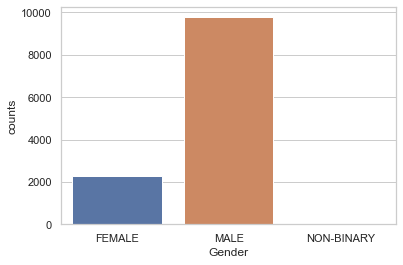

In [13]:
artists["Gender"]=artists["Gender"].str.upper()
gender = artists.groupby(['Gender']).size().reset_index(name='counts')
sns.barplot(x="Gender" , y = "counts" , data = gender)

### Here I tried to use some of the visualization commands from the Lab 2 to visualize somewhat random parameters to see if anything interesting came up or if any conclusions could be drawn from any of the graphs. 

<AxesSubplot:xlabel='Life', ylabel='Count'>

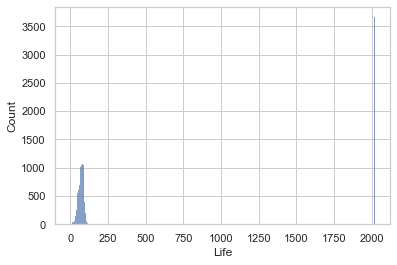

In [14]:
sns.histplot(data=artists, x="Life")

<AxesSubplot:>

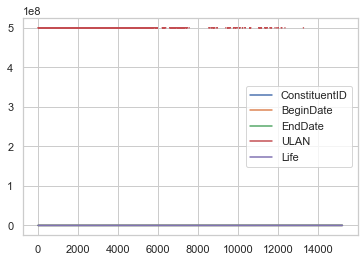

In [233]:
artists.plot()

<AxesSubplot:>

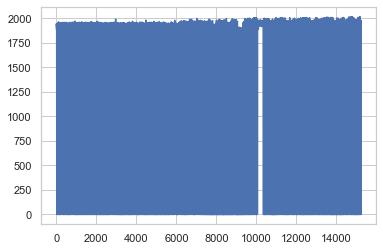

In [234]:
artists['BeginDate'].plot()

In [235]:
artists['Nationality'].value_counts()

American       5194
German          969
British         854
French          848
Italian         539
               ... 
Bangladeshi       1
Burkinabe         1
Persian           1
Ugandan           1
Salvadoran        1
Name: Nationality, Length: 118, dtype: int64

### Here I thought that I would try to visualize BeginDate and Nationality against each other to see if I could find any significant correlations between the age in which notable artists of different countries have been born to see if this could signal a golden age of each countries artistic era. 

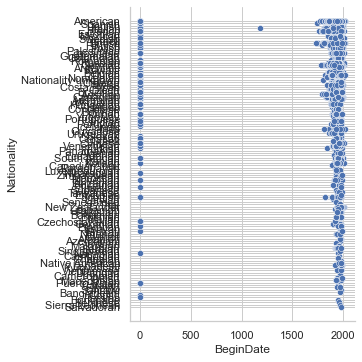

In [242]:

sns.relplot(x="BeginDate", y="Nationality", data=artists)

### I tried this visualization because I thought this could potentially signal a change in the heights of artworks produced throughout the different eras. 

/Users/alisasanian/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alisasanian/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


/Users/alisasanian/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8288 missing from current font.
  font.set_text(s, 0, flags=flags)


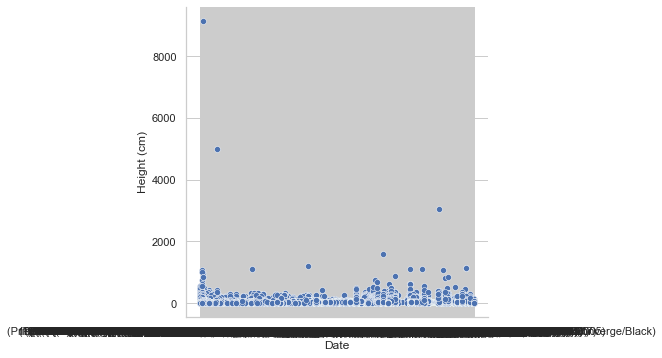

In [18]:

sns.relplot(x="Date", y="Height (cm)", data=artwork)

In [15]:
artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN,Life
0,1,Robert Arneson,"American, 1930–1992",American,MALE,1930,1992,NaN,NaN,62
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,MALE,1936,2021,NaN,NaN,85
2,3,Bill Arnold,"American, born 1941",American,MALE,1941,2021,NaN,NaN,80
3,4,Charles Arnoldi,"American, born 1946",American,MALE,1946,2021,Q1063584,500027998.0,75
4,5,Per Arnoldi,"Danish, born 1941",Danish,MALE,1941,2021,NaN,NaN,80


In [7]:
artwork.describe()

,ObjectID,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
count,138151.000000,10.000000,13839.000000,1462.000000,120355.000000,742.000000,290.000000,119434.000000,0.0,2.140000e+03
mean,97170.256618,44.868020,16.353863,23.094845,37.456124,89.687579,1283.674965,37.973398,NaN,6.156488e+03
std,81950.720570,28.631604,54.495960,44.626483,49.604159,329.428165,12017.504240,67.277097,NaN,1.371250e+05
min,2.000000,9.900000,0.000000,0.635000,0.000000,0.000000,0.090000,0.000000,NaN,0.000000e+00
25%,36671.500000,23.500000,0.000000,7.778800,17.938786,17.100000,5.726700,17.500000,NaN,1.200000e+02
50%,73896.000000,36.000000,0.317501,13.652500,27.800000,26.700000,20.185100,25.400051,NaN,4.330000e+02
75%,141636.500000,71.125000,9.842510,24.980950,43.900000,79.700000,77.678500,44.200000,NaN,1.620000e+03
max,419289.000000,83.800000,1808.483617,914.400000,9140.000000,8321.056600,185067.585957,9144.000000,NaN,6.283065e+06


In [8]:
artwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               138112 non-null  object 
 1   Artist              136868 non-null  object 
 2   ConstituentID       136868 non-null  object 
 3   ArtistBio           132226 non-null  object 
 4   Nationality         136868 non-null  object 
 5   BeginDate           136868 non-null  object 
 6   EndDate             136868 non-null  object 
 7   Gender              136868 non-null  object 
 8   Date                135949 non-null  object 
 9   Medium              128450 non-null  object 
 10  Dimensions          128397 non-null  object 
 11  CreditLine          135714 non-null  object 
 12  AccessionNumber     138151 non-null  object 
 13  Classification      138151 non-null  object 
 14  Department          138151 non-null  object 
 15  DateAcquired        131026 non-nul

In [8]:
artwork = artwork.fillna(method= "backfill")

<AxesSubplot:xlabel='Height (cm)', ylabel='Length (cm)'>

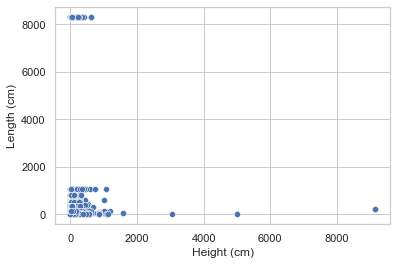

In [221]:
sns.scatterplot(x = r"Height (cm)" ,y = r"Length (cm)"  , data = artwork )

<AxesSubplot:xlabel='Height (cm)', ylabel='Weight (kg)'>

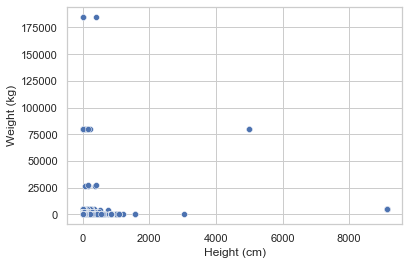

In [222]:
sns.scatterplot(x = r"Height (cm)" ,y = r"Weight (kg)"  , data = artwork )

In [225]:
artwork["Nationality"].unique()

array(['(Austrian)', '(French)', '()', ...,
       '() (Swiss) (French) (Dutch) (American)',
       '() (Swiss) (French) (American)',
       '() (American) (American) (German) (American) (American) (American)'],
      dtype=object)

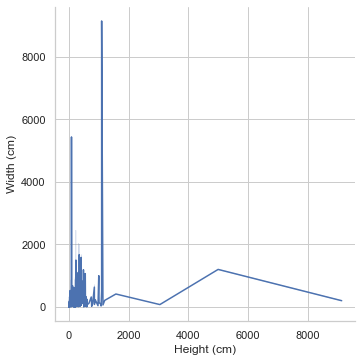

In [228]:

sns.relplot(x=r"Height (cm)", y="Width (cm)", kind="line", data=artwork);

In [232]:
artwork["Gender"].unique()

array(['(Male)', '(Male) (Male)', '(Male) (Female)',
       '(Male) (Male) (Male)', '() (Female) (Male)', '(Female)',
       '(Male) (Female) (Male) (Female)', '() (Male) (Male)',
       '() (Male) (Male) (Female)', '(Male) (Male) (Female) (Female)',
       '(Male) (Male) (Male) (Male) (Male)',
       '(Male) (Female) (Female) (Male)',
       '(Male) () (Male) (Female) (Male) (Male) (Male) (Male) (Female)',
       '() (Male)', '()', '() (Male) (Male) (Male) (Male) (Male) (Male)',
       '(Male) () ()', '() (Male) (Male) (Male) (Male) (Male)',
       '(Female) (Male)',
       '() (Male) (Male) (Male) (Male) (Male) (Male) (Male)',
       '() (Male) (Male) (Male) (Female) (Male)',
       '(Male) (Male) (Male) (Male) (Female) (Male) (Male) (Male) (Male) (Male)',
       '(Male) (Male) (Male) (Male) (Female) (Male)',
       '(Male) (Female) (Male)', '(Male) (Male) () ()',
       '(Male) (Male) (Male) (Male) (Male) (Male)',
       '() (Male) (Male) (Male)',
       '(Male) (Male) (Female) (Mal